# Storytelling Data Visualization Lab

In this lab you'll use a dataset called `housing_prices.csv` which contains the sales data of houses. The dataset and descriptions of the columns are available from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). For your convenience, you can review the descriptions of the data columns from [here](data-description.txt).

Pretend you are a data analyst at an investment company where the board decided to make investments in real estates. Your boss asked you to analyze this housing sales dataset and present to the investment managers on **what features of houses are strong indicators of the final sale price**. You need to present your findings in intuitive ways so that the investment managers understand where your conclusions come from.

#### You will use the appropriate data visualization graphs to tell your stories.

## Challenge 1 - Understanding the Dataset

After receiving the data and clarifying your objectives with your boss, you will first try to understand the dataset. This allows you to decide how you will start your research in the next step.

#### First, import the basic libraries and the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('housing_prices.csv')

#### As a routine before analyzing a dataset, print the first few rows of the dataset

In [2]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


You find the dataset has 81 columns which are a lot. 

#### Since the column `Id` is meaningless in our data visualization work, let's drop it

In [3]:
# your code here
df_noid = df.drop('Id', axis=1)
df_noid.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


You care about missing values. If a column has too many missing values, it is not reliable to use it to predict sales price.

#### In the cell below, calculate the percentage of missing values for each column. 

Make a table containing the column name and the percentage of missing values. Print the columns where more than 20% of values are missing. An example of your output looks like:

![Missing Values](missing-values.png)

[This reference](https://stackoverflow.com/questions/51070985/find-out-the-percentage-of-missing-values-in-each-column-in-the-given-dataset) can help you make the missing values table.

In [4]:
percent_missing = df_noid.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df_noid.columns,
                                 'percent_missing': percent_missing})
filt_missing = missing_value_df['percent_missing'] != 0
missing_value_df[filt_missing]



,column_name,percent_missing
LotFrontage,LotFrontage,17.739726
Alley,Alley,93.767123
MasVnrType,MasVnrType,0.547945
MasVnrArea,MasVnrArea,0.547945
BsmtQual,BsmtQual,2.534247
BsmtCond,BsmtCond,2.534247
BsmtExposure,BsmtExposure,2.602740
BsmtFinType1,BsmtFinType1,2.534247
BsmtFinType2,BsmtFinType2,2.602740
Electrical,Electrical,0.068493


#### Drop the columns you find that have more than 20% missing values.

After dropping, check the shape of your dataframes. You should have 75 columns now.

In [5]:
# your code here
miss_20_df = missing_value_df.loc[missing_value_df['percent_missing'] > 20]
cols_to_drop = miss_20_df['column_name'].to_list()
cols_to_drop

df_filtered = df_noid.drop(cols_to_drop, axis = 1)
len(df_filtered.columns)


75

Since you're asked to analyze sale prices, first let's see if the sale prices (column `SalePrice`) has a normal distribution. This is important because normally distributed data can be better represented with mathematical models.

#### In the cell below, use the propriate graph to visualize the shape of distribution of the sale prices. Then explain what you find from the graph about data distribution.

In [6]:
# your code here
#df_filtered.dtypes
df_filtered['YrSold'].astype('str')
df_filtered.dtypes


MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 75, dtype: object

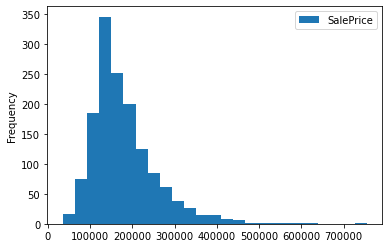

In [8]:
sales_distr = df_filtered[['SalePrice', 'YrSold']].groupby('YrSold', as_index = False).agg('sum')
sales_distr
df_filtered.plot.hist(y ='SalePrice', bins= 25);

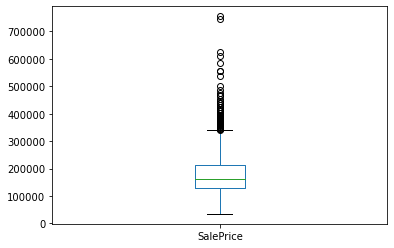

In [9]:
df_filtered.plot.box(y ='SalePrice');

# your comment here
The distribution seems to be not symmetric, thus it is not a normal distribution

## Bonus Challenge 1 - Adjust Data Distribution

If you used the correct method in the previous step, you should have found the data distribution is skewed to the left. In order to improve your data visualization in the next steps, you can opt to adjust the `SalePrice` column by applying a mathematical function to the values. The goal is to produce a bell-shape normal distribution after applying the mathematical function to the sale price.

*This technique is optional in data visualization but you'll find it useful in your future machine learning analysis.*

#### In the cell below, adjust the `SalePrice` column so that the data are normally distributed.

Try applying various mathematical functions such as square root, power, and log to the `SalePrice` column. Visualize the distribution of the adjusted data until you find a function that makes the data normally distributed. **Create a new column called `SalePriceAdjusted` to store the adjusted sale price.**

[This reference](https://trainingdatascience.com/workshops/histograms-and-skewed-data/) shows you examples on how to adjust skewed data.

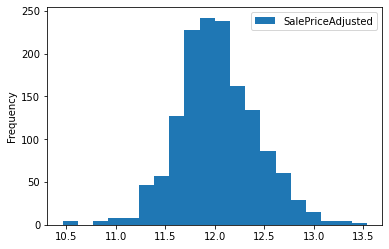

In [10]:
# your code here
df_filtered['SalePriceAdjusted'] = np.log(df_filtered['SalePrice'])
df_filtered.plot.hist(y ='SalePriceAdjusted', bins= 20);

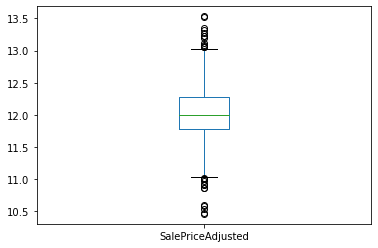

In [11]:
df_filtered.plot.box(y ='SalePriceAdjusted');

## Challenge 2 - Exploring Data with Common Sense

Now that we have a general understanding of the dataset, we start exploring the data with common sense by means of data visualization. Yes, in data analysis and even machine learning you are often required to use common sense. You use your common sense to make a scientific guess (i.e. hypothesis) then use data analytics methods to test your hypothesis.

This dataset is about housing sales. According to common sense, housing prices depend on the following factors:

* **Size of the house** (`GrLivArea`, `LotArea`, and `GarageArea`).

* **Number of rooms** (`BedroomAbvGr`, `KitchenAbvGr`, `FullBath`, `HalfBath`, `BsmtFullBath`, `BsmtHalfBath`).

* **How long the house has been built or remodeled** (`YearBuilt` and `YearRemodAdd`).

* **Neighborhood of the house** (`Neighborhood`).

#### In this challenge, use the appropriate graph type to visualize the relationships between `SalePrice` (or `SalePriceAdjusted`) and the fields above. 

Note that:

* Transform certain columns in order to visualize the data properly based on common sense. For example:
    * Visualizing how the number of half bathrooms affected the sale price probably does not make sense. You can create a new column to calculate the total number of bathrooms/rooms then visualize with the calculated number.
    * `YearBuilt` and `YearRemodAdd` are year numbers not the age of the house. You can create two new columns for how long the house has been built or remodeled then visualize with the calculated columns.
* Make comments to explain your thinking process.

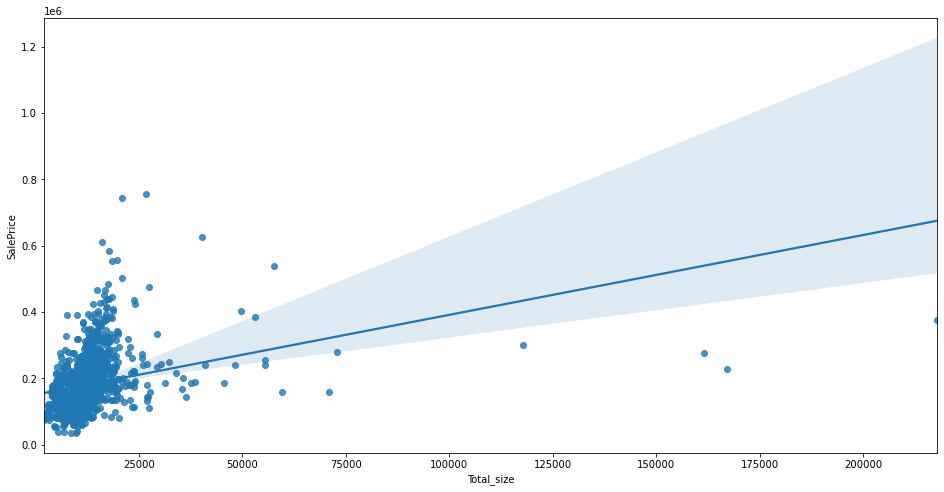

In [12]:
#SIZE OF THE HOUSE
df_filtered['Total_size'] = df_filtered['GrLivArea'] + df_filtered['LotArea'] + df_filtered['GarageArea']
fig, ax = plt.subplots(figsize = (16,8))
#ax = df_filtered.plot.scatter(x = 'Total_size', y = 'SalePrice',  ax = ax)
sns.regplot(data = df_filtered, x = 'Total_size', y = 'SalePrice', ax = ax);

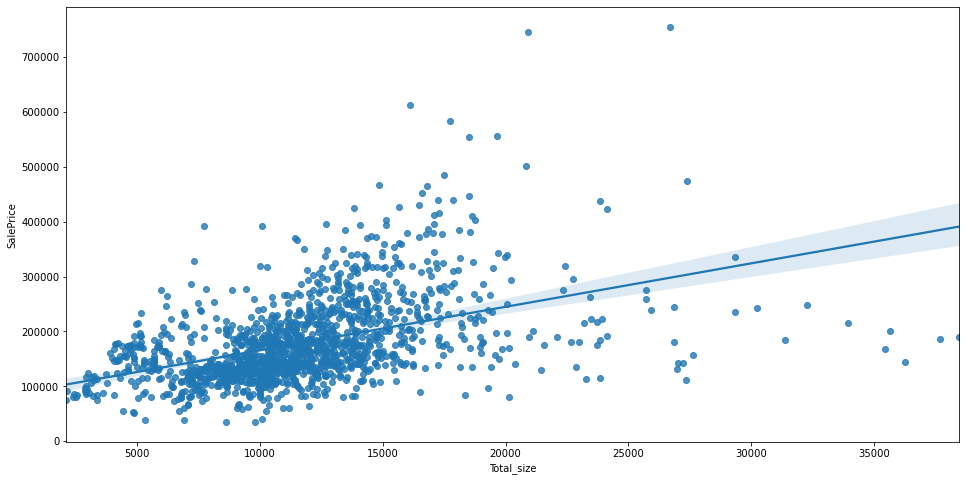

In [13]:
#Lets filter the outer values
filt_bigs = df_filtered['Total_size'] < 40000
df_filt_size = df_filtered[filt_bigs]
fig, ax = plt.subplots(figsize = (16,8))
sns.regplot(data = df_filt_size, x = 'Total_size', y = 'SalePrice', ax = ax);

### The price slightly depends on the total size of the house, as the regresion line is a bit ascendent. however, I think it is not a significant factor, because the values are very concentred

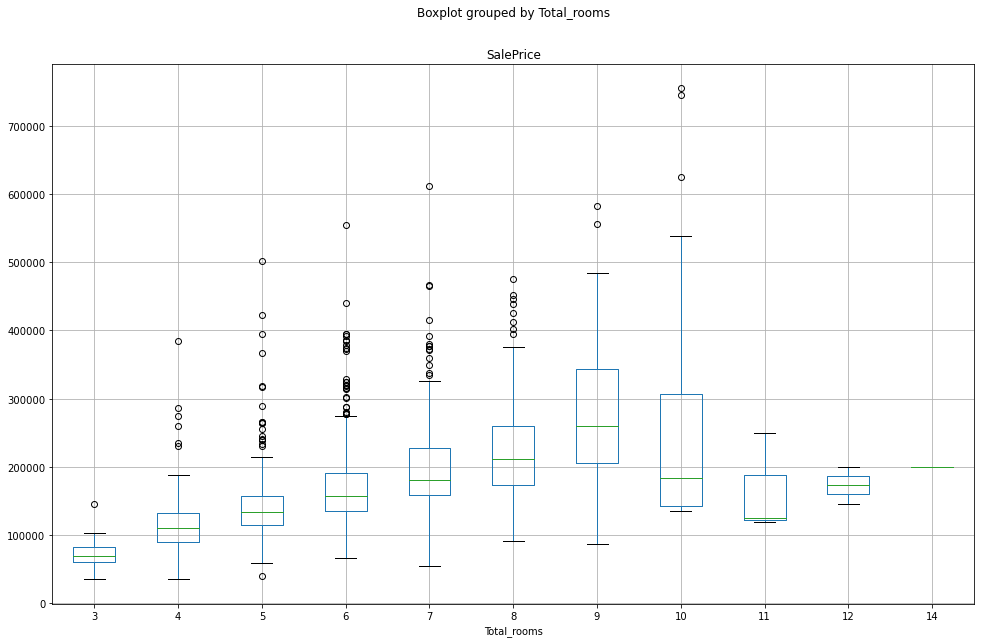

In [14]:
#NUMBER OF ROOMS
df_filtered['Total_rooms'] = df_filtered['BedroomAbvGr'] + df_filtered['KitchenAbvGr'] + df_filtered['FullBath'] + df_filtered['HalfBath'] + df_filtered['BsmtFullBath'] + df_filtered['BsmtHalfBath']
df_filtered['Total_rooms'].astype('object')
#sales_rooms = df_filtered[['SalePrice', 'Total_rooms']].groupby('Total_rooms', as_index = False).agg('mean')

fig, ax = plt.subplots(figsize =(16,10))
ax = df_filtered.boxplot(column = 'SalePrice', by= 'Total_rooms',  ax = ax)


### In this graph we can see that the houses with 8 - 9 rooms in total are sold with higher price. So we CANNOT say that the more rooms it has, the more expensive the house is.

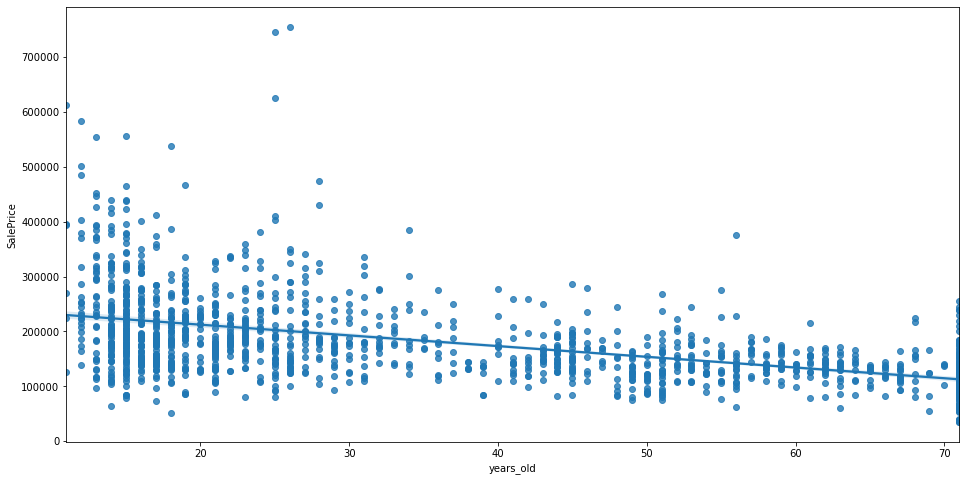

In [15]:
#HOW LONG THE HOUSE HAS BEEN BUILT OR REMODELED
#Lets calculate a column with the years is a house old (remoleded or not)
df_filtered['years_old'] = 2021 - df_filtered[['YearBuilt' ,'YearRemodAdd']].max(axis = 1)
#df_filtered['years_old']

fig, ax = plt.subplots(figsize = (16,8))
sns.regplot(data = df_filtered, x = 'years_old', y = 'SalePrice', ax = ax);

### In this graph we can see than the newer or recently remodeled houses are sold by a higher price than the olds ones

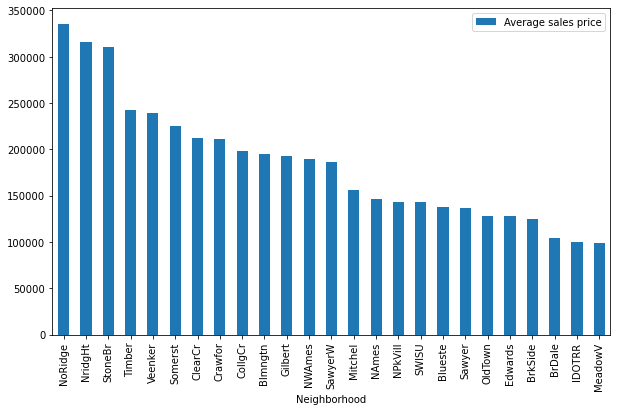

In [16]:
# NEIGHBORGHOOD
#df_filtered['Neighborhood'].unique()
sales_neighbor = df_filtered[['SalePrice', 'Neighborhood']].groupby('Neighborhood', as_index = False).agg('mean')
sales_neighbor_sort = sales_neighbor.sort_values(by =['SalePrice'], ascending=False)

fig, ax = plt.subplots()
ax = sales_neighbor_sort.plot.bar(x ='Neighborhood', ax = ax, figsize = (10,6))
ax.legend(['Average sales price']);


### The three neighborhoods with higher average prices are: NoRidge, NridgHt and StoneBr

## Bonus Challenge 2 - Exploring Data with Correlation Heatmap

Now you have explored data visualizations with certain fields based on common sense. In the dataset there are many other fields that you are not sure whether they are important factors for the sale price. What is the best way to explore those fields without investigating them individually?

Making scatter matrix is not an option here because there are too many fields which makes it extremely time consuming to create scatter matrix. One option you have is to create a heatmap. Heatmaps are much less expensive to create than scatter matrixes. You can use heatmaps to visualize the pairwise correlations between each two variables.

Here is a [reference](https://seaborn.pydata.org/examples/many_pairwise_correlations.html) you can use to learn how to creat the pairwise correlation heatmap. Your heatmap should look like below:

![Corr Heatmap](heatmap.png)

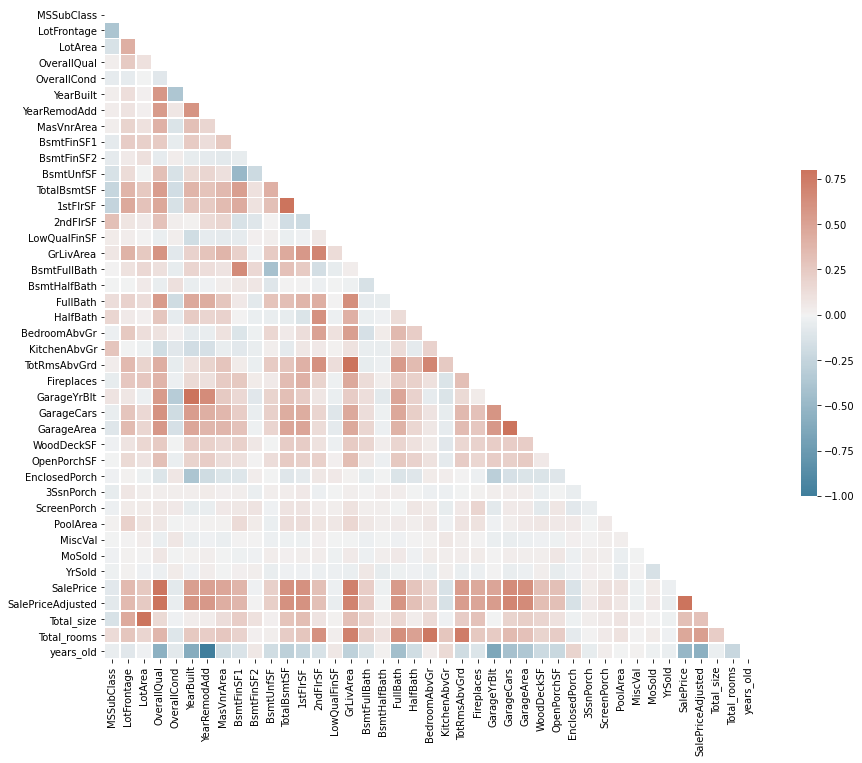

In [17]:
# Compute the correlation matrix
corr = df_filtered.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.8, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In your heatmap, you can easily identify the highly correlated (either positively or negatively) variables by looking for the grids with darker colors. 

#### In the cell below, summarize what variables are highly correlated to the sale price?

In [ ]:
'''
Negatively --> the more, the lower the price --> years_old
This makes sense, as the newer houses are more expensive

Positively --> the more, the higher the price.
OverallQual --> Overall material and finish quality rises the final price of the house
YearBuilt, YearRemodAdd --> If the year is higher, the house is built or remodeled more recently, thus this rises the price
MasVnrArea  --> the quantit of masonry is directly proportional to price
TotalBsmtSF --> having a big basement increase the house price.
1stFlrSF --> The size of first floor is directly proportional to price
GrLivArea, TotRmsAbvGrd --> The more total living space (not basement), the higher is the price of the house.
FullBath  --> The more bathrooms it has, the more expensive the house is.
GarageCars, GarageArea --> Houses with bigger garage are more apreciated
'''


## Challenge 3 - Present Your Stories

Now based on your findings from the explorations, summarize and present your stories.

#### Present the top 5 factors that affect the sale price.

Use the following format to present each factor:

1. A title line about the factor.

1. No more than 3 sentences to describe the relationship between the factor and the sale price.

1. Support your point with the appropriate graph.

## Polular neighborhoods increase the price
###The location of the house is very important, influencing its price depending on the area.
###The most popular neighborhoods have more demand, thus the price rises considerably.
###In this case the three neighborhoods that are the most popular are NoRidge, NridgHt and StoneBr

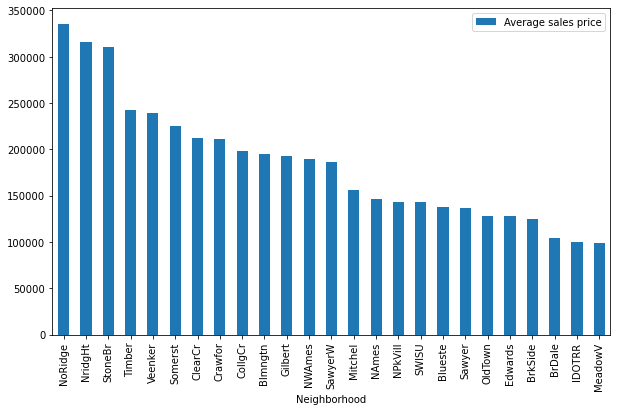

In [18]:
fig, ax = plt.subplots()
ax = sales_neighbor_sort.plot.bar(x ='Neighborhood', ax = ax, figsize = (10,6))
ax.legend(['Average sales price']);

## New and remodeled houses are more valuable
##The new houses and the ones remodeled recently are sold by higher prices, as the time of use decreases their value

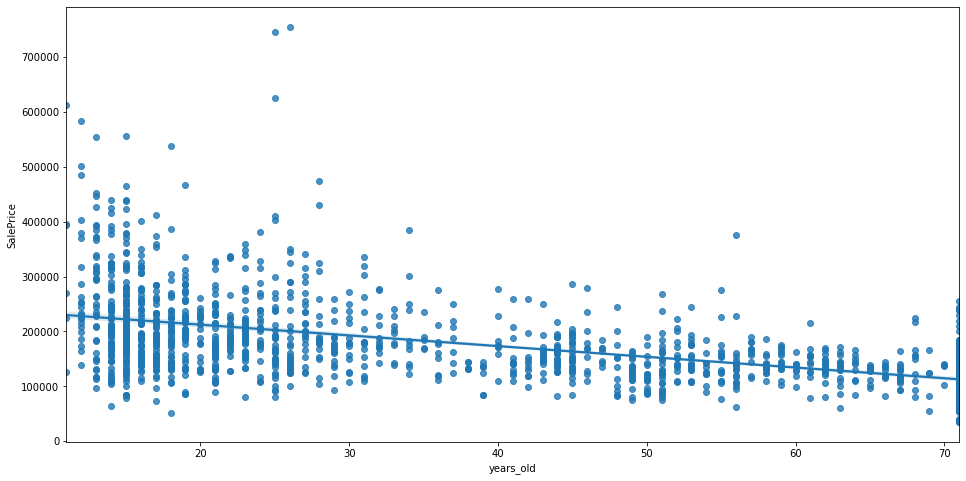

In [19]:
fig, ax = plt.subplots(figsize = (16,8))
sns.regplot(data = df_filtered, x = 'years_old', y = 'SalePrice', ax = ax);

## Quality materials is a bonus
###A high level of quality in build materials is a symbol of luxury and durability.
###Thus this factor rise the price of the house considerably.

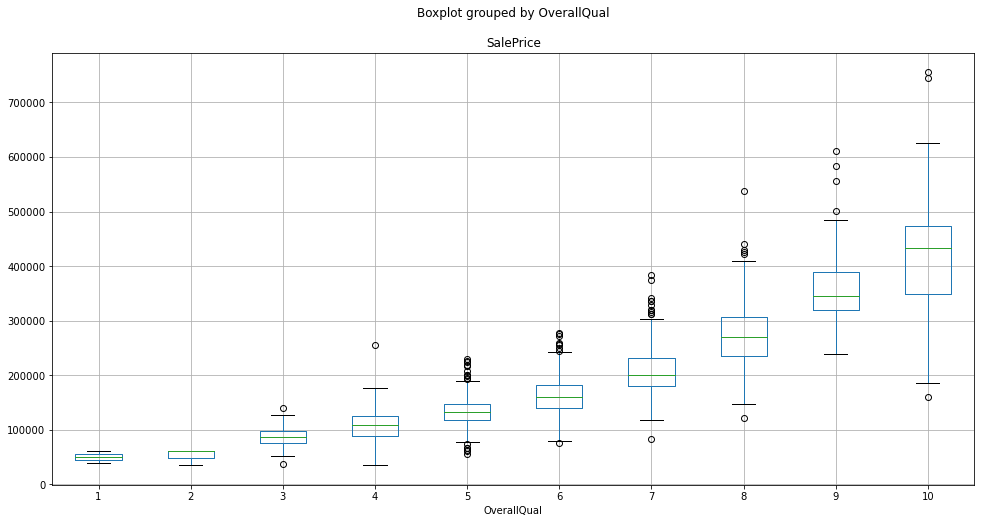

In [22]:
#df_filtered['OverallQual'].unique()
fig, ax = plt.subplots(figsize =(16,8))
ax = df_filtered.boxplot(column = 'SalePrice', by= 'OverallQual',  ax = ax)

## Garage space is a necessity
###Nowadays the car in essential in many places, and every member of the family needs it. 
###Only families with high purchasing power can aford many cars and garage space for all 


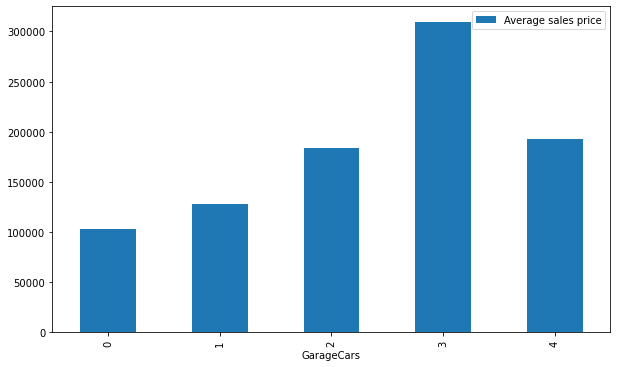

In [24]:
#df_filtered['GarageCars'].unique()

garage_num = df_filtered[['SalePrice', 'GarageCars']].groupby('GarageCars', as_index = False).agg('mean')
#sales_neighbor_sort = sales_neighbor.sort_values(by =['SalePrice'], ascending=False)

fig, ax = plt.subplots()
ax = garage_num.plot.bar(x ='GarageCars', ax = ax, figsize = (10,6))
ax.legend(['Average sales price']);


## Size always matters
###The price of the house is lineal dependable of the living space.

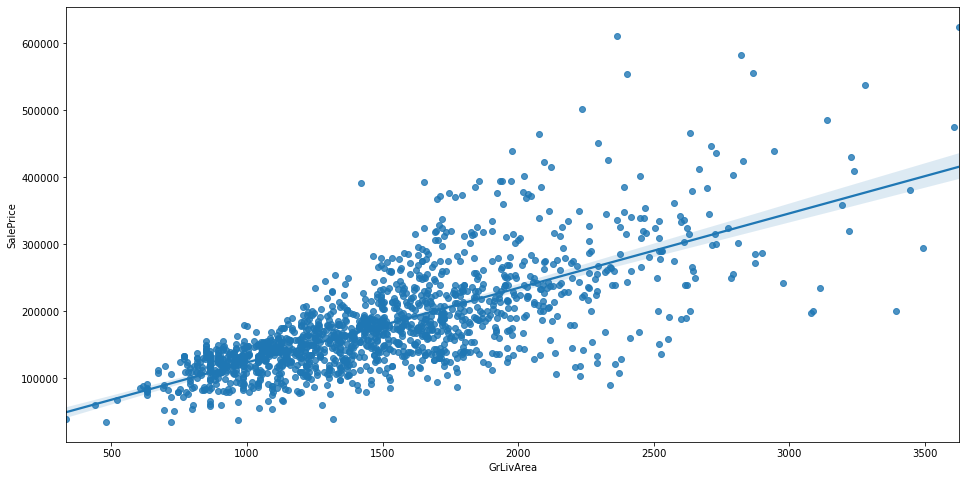

In [26]:
filt_area = df_filtered['GrLivArea'] < 4000
df_filt_area = df_filtered[filt_area]
fig, ax = plt.subplots(figsize = (16,8))
sns.regplot(data = df_filt_area, x = 'GrLivArea', y = 'SalePrice', ax = ax);